**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5
+ scipy 1.1.0

# Критерий согласия Пирсона ( $\chi^2$)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

In [2]:
import scipy
print(np.__version__)
print(pd.__version__)
print(scipy.__version__)

1.16.2
0.24.2
1.2.1


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Исчерпанная рождаемость

Исчерпанная рождаемость — количество детей, родившихся у женщины на момент окончания конвенционального репродуктивного возраста (45 лет). Для 1878 женщин старше 45, участвовавших в социологическом опросе жителей Швейцарии, известно количество детей. Этот признак — типичный счётчик, а, значит, его можно попробовать описать распределением Пуассона.

* **выборка** - целочисленный вектор длиы $n$, характеризующий количество детей у опрашиваемой женщины
* **гипотеза $H_0$** - рассматриваемая величина имеет распределение Пуассона

In [4]:
fin = open('fertility.txt', 'r')
data = list(map(lambda x: int(x.strip()), fin.readlines()))

In [5]:
data[:20]

[0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 3, 2, 2, 4]

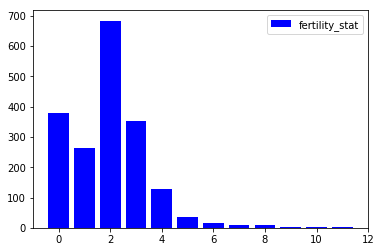

In [6]:
pylab.bar(range(12), np.bincount(data), color = 'b', label = 'fertility_stat')
pylab.legend()

In [7]:
l = np.mean(data)
l

1.93716719914803

## Критерий согласия

In [69]:
#подогнал то же самое, но сложнее по сути. Брал из диплома своего
histo, bin_edges = np.histogram(data, bins=11, density=False)
cdf = [0]
for i in range(min(data), max(data)+1):
    cdf.append(stats.poisson.cdf(k=i, mu=l))
f_exp = len(data) * np.diff(cdf)

In [25]:
np.bincount(data)

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1])

In [40]:
observed_frequences = np.bincount(data)
observed_frequences

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1])

In [9]:
expected_frequences = [len(data)*stats.poisson.pmf(x, l) for x in range(min(data), max(data) + 1)]
expected_frequences

[270.6416065637888,
 524.2780429600978,
 507.80711402791167,
 327.9024282629646,
 158.80045713800124,
 61.52460735548975,
 19.863908551586047,
 5.49710172757265,
 1.3311006446292126,
 0.28650716750450117,
 0.055501228721053016,
 0.009774105435530582]

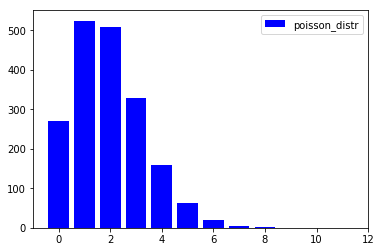

In [18]:
pylab.bar(range(len(expected_frequences)), expected_frequences, color = 'b', label = 'poisson_distr')
pylab.legend()

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
При справедливости нулевой гипотезы имеет распределение хи-квадрат с числом степеней свободы $K-1-m$, где $m$ - число параметров распределения, оцененных по выборке.

In [19]:
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=431.5752205284916, pvalue=1.772613180233512e-86)